In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('TonerItDown.csv', header=0)
data.head(5)

,Request no,Day,Time of day,Request location,Initial diagnose time,Needs Replacement?,On-site repair time
0,1,1,0.239113,BC_10,12.633020,NaN,22.125290
1,2,1,1.139550,BC_1,19.486501,yes,NaN
2,3,1,1.309831,BC_5,16.161550,NaN,7.349665
3,4,1,1.458689,BC_4,17.991248,NaN,31.835509
4,5,1,1.754376,BC_5,16.736394,NaN,10.733933


# Q 5

In [3]:
data['Request location'].unique()

array(['BC_10', 'BC_1', 'BC_5', 'BC_4', 'BC_9', 'BC_6', 'BC_8', 'BC_3',
       'BC_7', 'BC_2'], dtype=object)

In [4]:
data['o_BC_1'] = (data['Request location'] == 'BC_1').astype(int)
data['o_BC_2'] = (data['Request location'] == 'BC_2').astype(int)
data['o_BC_3'] = (data['Request location'] == 'BC_3').astype(int)
data['o_BC_4'] = (data['Request location'] == 'BC_4').astype(int)
data['o_BC_5'] = (data['Request location'] == 'BC_5').astype(int)
data['o_BC_6'] = (data['Request location'] == 'BC_6').astype(int)
data['o_BC_7'] = (data['Request location'] == 'BC_7').astype(int)
data['o_BC_8'] = (data['Request location'] == 'BC_8').astype(int)
data['o_BC_9'] = (data['Request location'] == 'BC_9').astype(int)
data['o_BC_10'] = (data['Request location'] == 'BC_10').astype(int)

In [5]:
def get_conf(x):
    m = len(x)
    avg = np.mean(x)
    LB = avg - st.norm.ppf(0.975)*np.sqrt(np.var(x, ddof=1)/m)
    UB = avg + st.norm.ppf(0.975)*np.sqrt(np.var(x, ddof=1)/m)
    return avg, LB, UB

In [6]:
print("Below are the (Mean, LB, UB) for each Location")
print("BC1", get_conf(data['o_BC_1'].values))
print("BC2", get_conf(data['o_BC_2'].values))
print("BC3", get_conf(data['o_BC_3'].values))
print("BC4", get_conf(data['o_BC_4'].values))
print("BC5", get_conf(data['o_BC_5'].values))
print("BC6", get_conf(data['o_BC_6'].values))
print("BC7", get_conf(data['o_BC_7'].values))
print("BC8", get_conf(data['o_BC_8'].values))
print("BC9", get_conf(data['o_BC_9'].values))
print("BC10", get_conf(data['o_BC_10'].values))

Below are the (Mean, LB, UB) for each Location
BC1 (0.039459007250418295, 0.034953027258082144, 0.043964987242754446)
BC2 (0.0822643614054657, 0.07590486254733364, 0.08862386026359775)
BC3 (0.1079196876742889, 0.10073826403251306, 0.11510111131606475)
BC4 (0.13552704963747908, 0.12760482913582438, 0.14344927013913378)
BC5 (0.11837702175125488, 0.11089991837860799, 0.12585412512390176)
BC6 (0.054935861684327944, 0.04966214442666805, 0.060209578941987835)
BC7 (0.12367540435025097, 0.11605580037328111, 0.13129500832722082)
BC8 (0.057863915225878415, 0.052459870226862756, 0.06326796022489407)
BC9 (0.13747908533184608, 0.12950902949162707, 0.1454491411720651)
BC10 (0.14249860568878975, 0.13440800150611018, 0.15058920987146932)


# Q6

In [54]:

lambda_ = []
for i in range(24):
#i = 0
    df = data.loc[(data['Time of day'] >= i) & (data['Time of day'] < i+1)]
    l = np.mean(df[['Day', 'Time of day']].groupby(['Day']).agg(['count']).values)

    #MLE for a stationary poisson process is the mean across all the observations

    lambda_.append(l) 



In [55]:
lambda_

[1.3529411764705883,
 1.7894736842105263,
 1.9574468085106382,
 3.1052631578947367,
 3.75,
 4.95,
 5.916666666666667,
 6.566666666666666,
 7.083333333333333,
 7.0,
 7.983333333333333,
 8.15,
 8.15,
 7.566666666666666,
 7.783333333333333,
 7.533333333333333,
 6.733333333333333,
 6.316666666666666,
 5.016666666666667,
 4.423728813559322,
 3.533333333333333,
 2.581818181818182,
 1.4772727272727273,
 1.5909090909090908]

(array([0.00703348, 0.00882633, 0.01448069, 0.02606525, 0.03254708,
        0.04054594, 0.05130302, 0.05557827, 0.05888815, 0.0595777 ,
        0.06743865, 0.06757656, 0.06812821, 0.06412878, 0.06578371,
        0.06081891, 0.05406125, 0.05144093, 0.04123549, 0.03351246,
        0.02730645, 0.01668727, 0.00786095, 0.00827468]),
 array([ 0.04797284,  1.05899275,  2.07001266,  3.08103256,  4.09205247,
         5.10307238,  6.11409228,  7.12511219,  8.1361321 ,  9.14715201,
        10.15817191, 11.16919182, 12.18021173, 13.19123163, 14.20225154,
        15.21327145, 16.22429135, 17.23531126, 18.24633117, 19.25735108,
        20.26837098, 21.27939089, 22.2904108 , 23.3014307 , 24.31245061]),
 <a list of 24 Patch objects>)

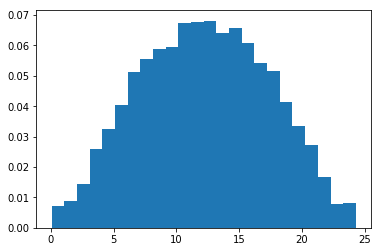

In [42]:
x = np.sort(data['Time of day'].values)
plt.hist(x, density = True, bins = 24)

Text(0.5,0,'time t')

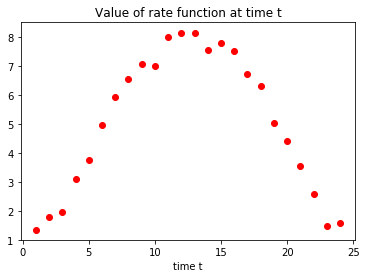

In [59]:
x = range(1,25)
y = lambda_
plt.scatter(x,y, c = 'red')
plt.title('Value of rate function at time t')
plt.xlabel('time t')

In [57]:
for i in range(24):
    print("Time Period: ",i," - ",i+1, " Has value of rate function: ", lambda_[i])

Time Period:  0  -  1  Has value of rate function:  1.3529411764705883
Time Period:  1  -  2  Has value of rate function:  1.7894736842105263
Time Period:  2  -  3  Has value of rate function:  1.9574468085106382
Time Period:  3  -  4  Has value of rate function:  3.1052631578947367
Time Period:  4  -  5  Has value of rate function:  3.75
Time Period:  5  -  6  Has value of rate function:  4.95
Time Period:  6  -  7  Has value of rate function:  5.916666666666667
Time Period:  7  -  8  Has value of rate function:  6.566666666666666
Time Period:  8  -  9  Has value of rate function:  7.083333333333333
Time Period:  9  -  10  Has value of rate function:  7.0
Time Period:  10  -  11  Has value of rate function:  7.983333333333333
Time Period:  11  -  12  Has value of rate function:  8.15
Time Period:  12  -  13  Has value of rate function:  8.15
Time Period:  13  -  14  Has value of rate function:  7.566666666666666
Time Period:  14  -  15  Has value of rate function:  7.783333333333333
T